In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

import pickle
from CONSTANTS import *
from Utils.helpers import *

## Partial Correlations

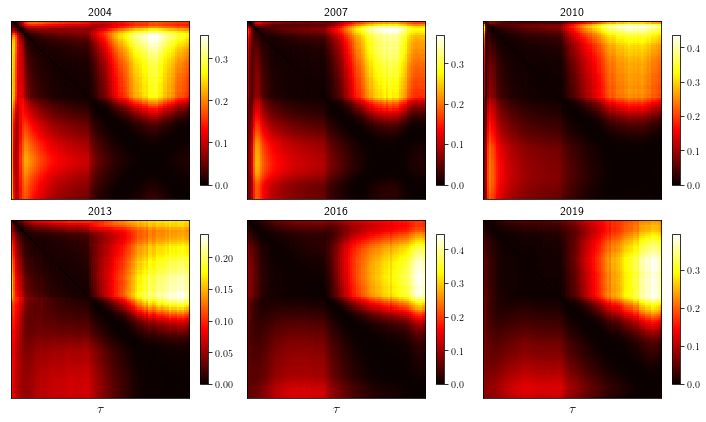

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pickle

# Define the number of rows and columns for the subplots
nrows = 2
ncols = 3

# Create the figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
# Set the text font to use LaTeX
plt.rc('text', usetex=True)

# Loop over the years and create the KL divergence plots
for i, year in enumerate([2004, 2007, 2010, 2013, 2016, 2019]):
    kl_list = []
    for tau in taus:
        mode = "normalized"
        with open(f"{path}Histograms/hist_{mode}_{year}_{tau}.pkl", "rb") as f:
            response = pickle.load(f)
            resampled = resample_histogram(response["x"], response["y"])
            # plt.plot(resampled[0], resampled[1])
            # plt.show()
            # exit()
            kl_list.append(resampled[1])

    output_mat = wrap_kl(kl_list)

    # Get the subplot indices based on the row and column numbers
    row_idx = i // ncols
    col_idx = i % ncols

    # Plot the KL divergence matrix in the appropriate subplot
    ax = axes[row_idx][col_idx]
    # ax.xaxis.set_major_locator(MaxNLocator(4))
    # ax.yaxis.set_major_locator(MaxNLocator(4))
    im = ax.imshow(output_mat, cmap='hot', interpolation='nearest', )
    
    # ax.set_xticks(taus)
    # ax.set_yticks(taus)
    
    # ax.xaxis.set_major_locator(MaxNLocator(2))
    # ax.yaxis.set_major_locator(MaxNLocator(2))
    
    step = (len(taus) - 1) / (1)

    # Calculate the indices of the N evenly spaced values
    indices = np.round(np.arange(0, len(taus), step)).astype(int)

    # Get the N evenly spaced values
    evenly_spaced_values = [taus[i] for i in indices]
    evenly_spaced_values = [1] + evenly_spaced_values # there is some bug in the maxNLocator code.

    
    # ax.set_xticklabels(evenly_spaced_values)
    # ax.set_yticklabels(evenly_spaced_values)    
    
    ax.set_title(f"{year}")
    fig.colorbar(im, ax=ax, shrink=0.3)
    
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

# Set the x and y axis labels for the last row of subplots
for ax in axes[-1]:
    ax.set_xlabel(r"$\tau$", fontsize=14)

for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass

plt.tight_layout()
fig.subplots_adjust(hspace=-0.6)

plt.savefig("KLD_heatmap.pdf", bbox_inches='tight')
# Show the plot
plt.show()